In [1]:
import pandas as pd
import numpy as np

import re

import ktrain
import tensorflow as tf
import sys

pd.set_option('display.max_colwidth', None)

In [8]:
df_news = pd.read_csv('df5.csv') #--> when trying to run ktrain
df_news.head(1)

,index,date,title,topics,combined,topics1,topics2
0,0,2020-12-15,There's a Big Tree Growing Through a Car in Illinois,25,"There's a Big Tree Growing Through a Car in Illinois Published: December 14, 2020 nanjanWere not exactly sure whats going here, but we have a pretty good idea. What do you think the story is with these photosAbout a month ago, I joined a public Facebook group called, ILLINOIS Abandoned Images .The beauty in the old, simplicity, the forgotten, is something to be cherished and never forgotten. It tells our story and we must listen.People share photos of Illinois abandoned houses, farms, commercial buildings, and just about anything else that weve just ignored and left behind. Ive lost quite a bit of time looking at some pretty remarkable photos. The only rule for being a part of this group, besides acting like a respectable adult, appears to be that you dont share or ask for addresses.Over the weekend, one member shared a couple photos of this Oldsmobile 442 that was just left behind. The stories that muscle car could tell... if cars could talk. Id like to know the story of how a tree just grew right through it. At some point, youd think the owner would say, damn, theres a tree growing through my 442, Ive got to move her. But that clearly didnt happen. And, why is it still there Its not like that tree just grew that big overnight. ILLINOIS Abandoned Images Troy Shepard ILLINOIS Abandoned Images Troy ShepardWhat do you think the story might beSteve Shannon is host of The Steve Shannon Show on 97ZOK. On the air weekday mornings from 6 to 10 a.m. and a special Rewind show, featuring favorite moments from previous shows, on Saturday mornings from 5 to 7 a.m.. Follow him on Twitter , Instagram , and like his page on Facebook .",2,6


In [9]:
df_news.columns

Index(['index', 'date', 'title', 'topics', 'combined', 'topics1', 'topics2'], dtype='object')

In [10]:
df_news = df_news.drop(columns = ['index'], axis = 1)
df_news.head(1)

,date,title,topics,combined,topics1,topics2
0,2020-12-15,There's a Big Tree Growing Through a Car in Illinois,25,"There's a Big Tree Growing Through a Car in Illinois Published: December 14, 2020 nanjanWere not exactly sure whats going here, but we have a pretty good idea. What do you think the story is with these photosAbout a month ago, I joined a public Facebook group called, ILLINOIS Abandoned Images .The beauty in the old, simplicity, the forgotten, is something to be cherished and never forgotten. It tells our story and we must listen.People share photos of Illinois abandoned houses, farms, commercial buildings, and just about anything else that weve just ignored and left behind. Ive lost quite a bit of time looking at some pretty remarkable photos. The only rule for being a part of this group, besides acting like a respectable adult, appears to be that you dont share or ask for addresses.Over the weekend, one member shared a couple photos of this Oldsmobile 442 that was just left behind. The stories that muscle car could tell... if cars could talk. Id like to know the story of how a tree just grew right through it. At some point, youd think the owner would say, damn, theres a tree growing through my 442, Ive got to move her. But that clearly didnt happen. And, why is it still there Its not like that tree just grew that big overnight. ILLINOIS Abandoned Images Troy Shepard ILLINOIS Abandoned Images Troy ShepardWhat do you think the story might beSteve Shannon is host of The Steve Shannon Show on 97ZOK. On the air weekday mornings from 6 to 10 a.m. and a special Rewind show, featuring favorite moments from previous shows, on Saturday mornings from 5 to 7 a.m.. Follow him on Twitter , Instagram , and like his page on Facebook .",2,6


In [11]:
df_news = df_news.reset_index(drop = True)

In [12]:
df_news = df_news.reset_index(drop = False)
df_news.head(1)

,index,date,title,topics,combined,topics1,topics2
0,0,2020-12-15,There's a Big Tree Growing Through a Car in Illinois,25,"There's a Big Tree Growing Through a Car in Illinois Published: December 14, 2020 nanjanWere not exactly sure whats going here, but we have a pretty good idea. What do you think the story is with these photosAbout a month ago, I joined a public Facebook group called, ILLINOIS Abandoned Images .The beauty in the old, simplicity, the forgotten, is something to be cherished and never forgotten. It tells our story and we must listen.People share photos of Illinois abandoned houses, farms, commercial buildings, and just about anything else that weve just ignored and left behind. Ive lost quite a bit of time looking at some pretty remarkable photos. The only rule for being a part of this group, besides acting like a respectable adult, appears to be that you dont share or ask for addresses.Over the weekend, one member shared a couple photos of this Oldsmobile 442 that was just left behind. The stories that muscle car could tell... if cars could talk. Id like to know the story of how a tree just grew right through it. At some point, youd think the owner would say, damn, theres a tree growing through my 442, Ive got to move her. But that clearly didnt happen. And, why is it still there Its not like that tree just grew that big overnight. ILLINOIS Abandoned Images Troy Shepard ILLINOIS Abandoned Images Troy ShepardWhat do you think the story might beSteve Shannon is host of The Steve Shannon Show on 97ZOK. On the air weekday mornings from 6 to 10 a.m. and a special Rewind show, featuring favorite moments from previous shows, on Saturday mornings from 5 to 7 a.m.. Follow him on Twitter , Instagram , and like his page on Facebook .",2,6


### K-Train

In [13]:
# Get texts in a list for ktrain
texts = df_news['combined'].tolist()

In [14]:
len(texts)

78014

In [15]:
%%time
tm = ktrain.text.get_topic_model(
    texts=texts, 
    n_topics=10, 
    n_features=10000, 
    min_df=5, 
    max_df=0.5, 
    stop_words='english', 
    model_type='lda', 
    lda_max_iter=5, 
    verbose=1)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
Wall time: 2min 51s


In [16]:
%%time
#tm.build(texts, threshold=0.25)
tm.build(texts)

done.
Wall time: 39.9 s


In [17]:
tm.print_topics(show_counts=True)

topic:2 | count:13844 | like just people time know said dont going think really
topic:9 | count:13180 | park area food city weather lake river home north restaurant
topic:4 | count:11987 | police said shot shooting officer officers man people killed video
topic:5 | count:6879 | city police said mayor lightfoot black trump people president officers
topic:7 | count:6579 | said county court illinois case attorney charges charged judge office
topic:6 | count:5746 | school said students university schools teachers illinois health community education
topic:0 | count:5493 | company business market services new water information industry global technology
topic:3 | count:5086 | illinois news https com www posted facebook new live email
topic:8 | count:4988 | illinois million tax year state said percent new energy states
topic:1 | count:4232 | illinois state law marijuana said use cannabis legal states people


In [18]:
def get_topics_articles(idx):
    return np.argmax(tm.get_doctopics(doc_ids=[idx]))

In [19]:
%%time
df_news['topics_final'] = df_news.apply(lambda x: get_topics_articles(x['index']), axis=1)

Wall time: 6h 32min 22s


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
topic0 = "company business market services new water information industry global technology"
topic1 = "illinois state law marijuana said use cannabis legal states people"
topic2 = "like just people time know said dont going think really"
topic3 = "illinois news https com www posted facebook new live email"
topic4 = "police said shot shooting officer officers man people killed video"
topic5 = "city police said mayor lightfoot black trump people president officers"
topic6 = "school said students university schools teachers illinois health community education"
topic7 = "said county court illinois case attorney charges charged judge office"
topic8 = "illinois million tax year state said percent new energy states"
topic9 = "park area food city weather lake river home north restaurant"

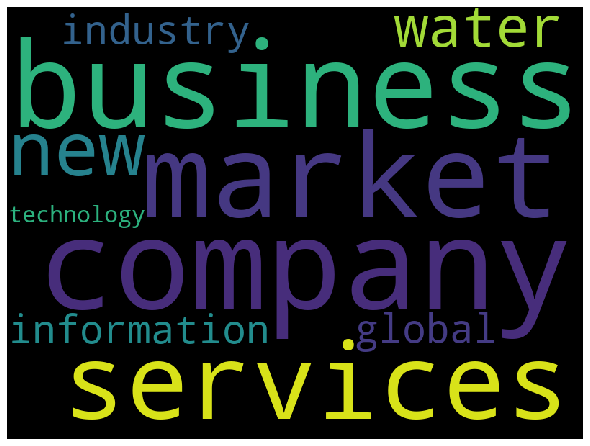

In [8]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic0)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

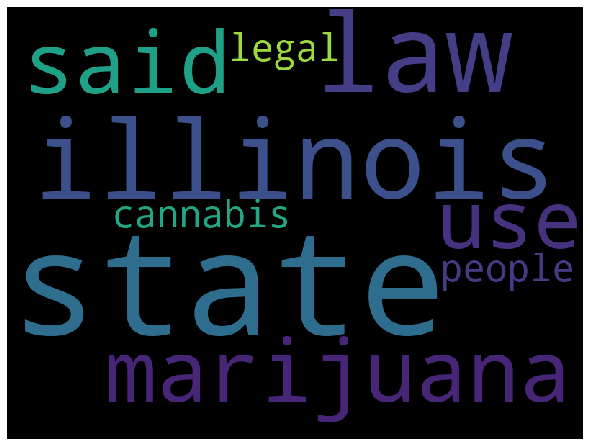

In [12]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic1)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

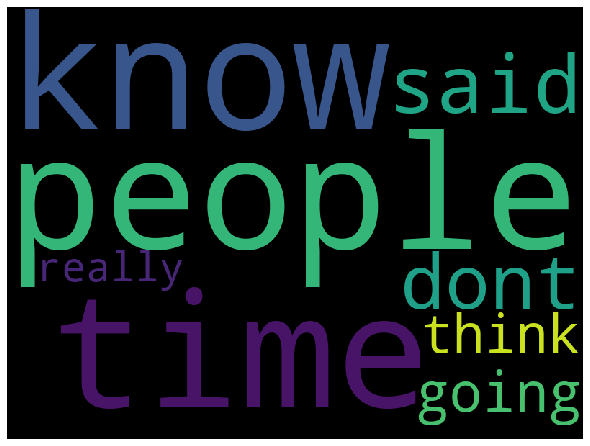

In [13]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic2)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

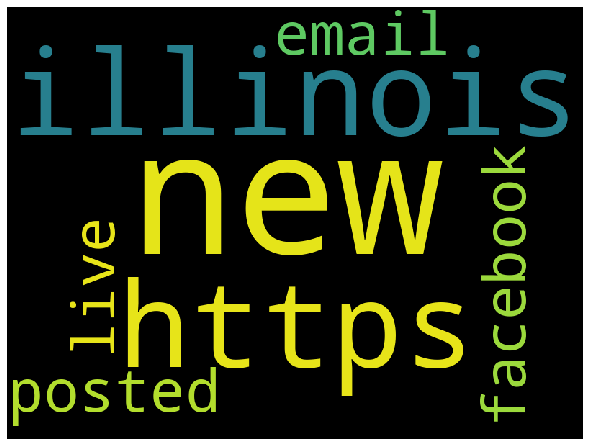

In [14]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic3)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

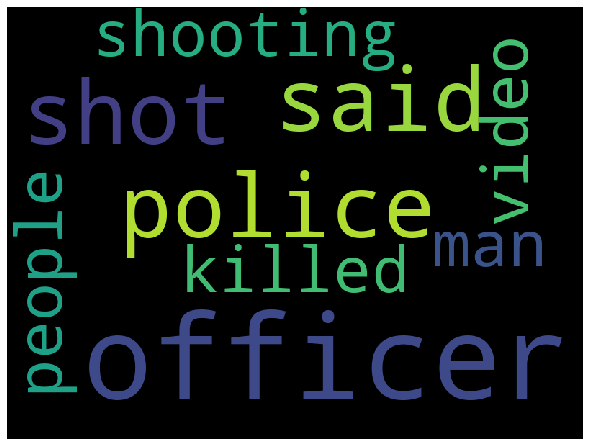

In [15]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic4)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

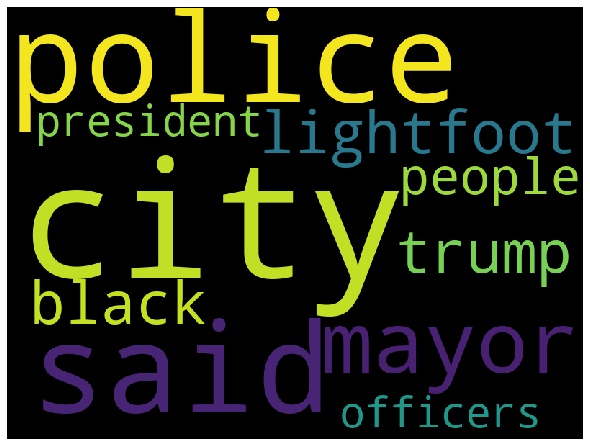

In [16]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic5)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

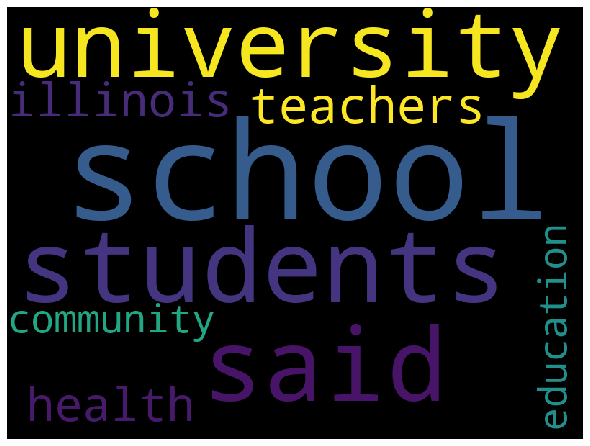

In [17]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic6)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

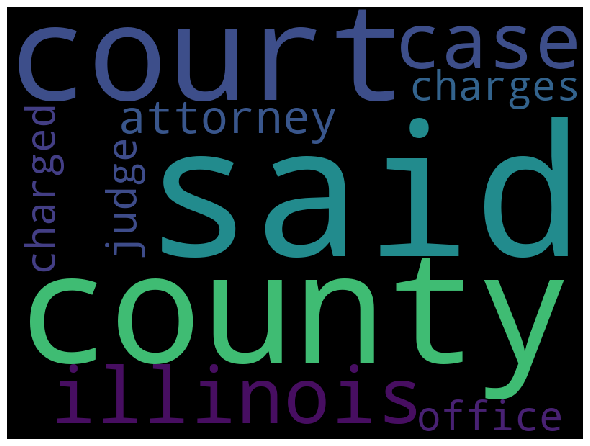

In [9]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic7)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

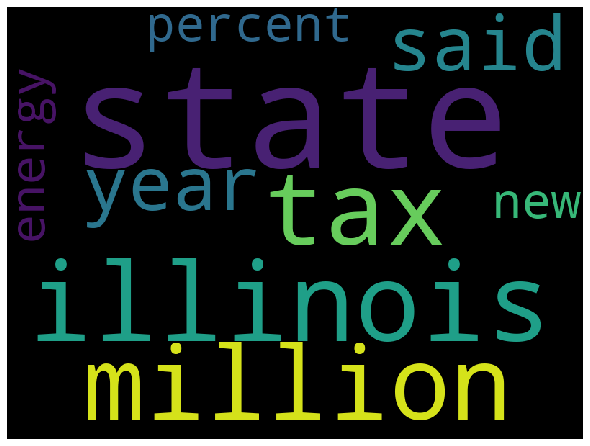

In [10]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic8)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

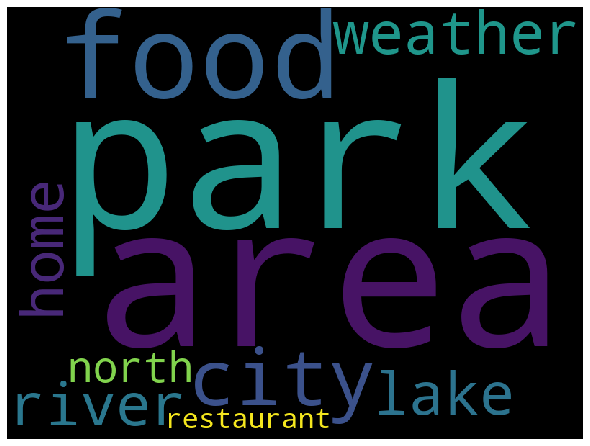

In [11]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topic9)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()